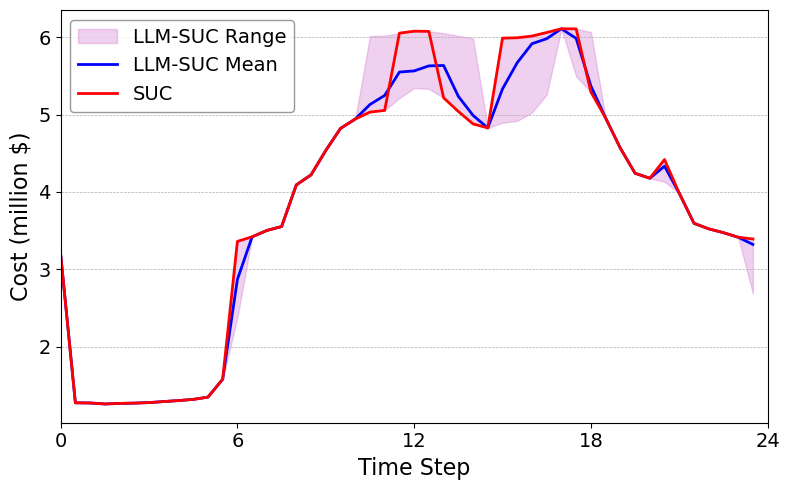

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from matplotlib.ticker import MaxNLocator

# Read data from .mat files
data_cost_dist = sio.loadmat('Costs_Dist.mat')
Cost_distributed = np.squeeze(data_cost_dist['Cost_distributed'])  # 48×1 array

data_cost_tests = sio.loadmat('Cost_Tests.mat')
Cost_decided = data_cost_tests['Cost_decided']  # 48×10 array

# Compute the minimum, mean, and maximum cost for each time step (across 10 runs)
MinCost = np.min(Cost_decided, axis=1)
MeanCost = np.mean(Cost_decided, axis=1)
MaxCost = np.max(Cost_decided, axis=1)

# Convert the costs into million dollars
MinCost_m = MinCost / 1e6
MeanCost_m = MeanCost / 1e6
MaxCost_m = MaxCost / 1e6
Cost_distributed_m = Cost_distributed / 1e6

# Create time steps; data points from 0 to 47, while the x-axis range is set from 0 to 48
TimeSteps = np.arange(0, 48)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the filled area representing the cost range
ax.fill_between(TimeSteps, MinCost_m, MaxCost_m, color=[0.8, 0.4, 0.8], alpha=0.3, label='LLM-SUC Range')

# Plot the mean cost curve and the SUC cost curve
ax.plot(TimeSteps, MeanCost_m, 'b-', linewidth=2, label='LLM-SUC Mean')
ax.plot(TimeSteps, Cost_distributed_m, 'r-', linewidth=2, label='SUC')

# Set axis labels (without a main title)
ax.set_xlabel('Time Step', fontsize=16)
ax.set_ylabel('Cost (million $)', fontsize=16)

# Set the x-axis range and ticks. Although the data range is 0 to 48,
# the labels are displayed as 0 to 24 (dividing the tick values by 2)
ticks = [0, 12, 24, 36, 48]
ax.set_xlim(0, 48)
ax.set_xticks(ticks)
ax.set_xticklabels([str(int(tick / 2)) for tick in ticks], fontsize=14)
ax.tick_params(axis='y', labelsize=14)

# Force the y-axis ticks to be integer values
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Display grid lines only on the y-axis for a clean look
ax.grid(axis='y', linestyle='--', linewidth=0.5)

# Add a legend
legend = ax.legend(loc='best', fontsize=14)
legend.get_frame().set_edgecolor('0.5')

# Use a tight layout and save the figure as a PNG file
plt.tight_layout()
plt.savefig('fig_day_stochastic.png', dpi=300, bbox_inches='tight')
plt.show()


In [7]:
MeanCost_m

array([3.19426 , 1.27684 , 1.27495 , 1.26199 , 1.26877 , 1.27303 ,
       1.27957 , 1.29319 , 1.30573 , 1.32118 , 1.35016 , 1.5811  ,
       2.870175, 3.42077 , 3.50285 , 3.55331 , 4.09116 , 4.22082 ,
       4.536   , 4.8207  , 4.9419  , 5.129596, 5.24654 , 5.548516,
       5.563308, 5.628484, 5.63366 , 5.2352  , 4.989112, 4.8273  ,
       5.331052, 5.66974 , 5.914704, 5.979468, 6.10786 , 5.983448,
       5.368888, 4.9554  , 4.566   , 4.24176 , 4.1772  , 4.332992,
       3.9839  , 3.5954  , 3.52379 , 3.47426 , 3.41534 , 3.322225])

In [9]:
MinCost_m

array([3.19426, 1.27684, 1.27495, 1.26199, 1.26877, 1.27303, 1.27957,
       1.29319, 1.30573, 1.32118, 1.35016, 1.5811 , 2.3785 , 3.42077,
       3.50285, 3.55331, 4.09116, 4.22082, 4.536  , 4.8207 , 4.9419 ,
       5.0313 , 5.0535 , 5.2137 , 5.3433 , 5.3313 , 5.2161 , 5.04   ,
       4.8786 , 4.8273 , 4.8939 , 4.9185 , 5.0268 , 5.2581 , 6.10786,
       5.4918 , 5.2914 , 4.9554 , 4.566  , 4.24176, 4.1772 , 4.13184,
       3.9839 , 3.5954 , 3.52379, 3.47426, 3.41534, 2.6875 ])

In [11]:
MaxCost_m

array([3.19426, 1.27684, 1.27495, 1.26199, 1.26877, 1.27303, 1.27957,
       1.29319, 1.30573, 1.32118, 1.35016, 1.5811 , 3.36185, 3.42077,
       3.50285, 3.55331, 4.09116, 4.22082, 4.536  , 4.8207 , 4.9419 ,
       6.01426, 6.0187 , 6.05074, 6.07666, 6.07426, 6.05122, 6.016  ,
       5.98372, 4.8273 , 5.98678, 5.9917 , 6.01336, 6.05962, 6.10786,
       6.10636, 6.06628, 4.9554 , 4.566  , 4.24176, 4.1772 , 4.4192 ,
       3.9839 , 3.5954 , 3.52379, 3.47426, 3.41534, 3.39275])

In [13]:
Cost_distributed_m

array([3.19426, 1.27684, 1.27495, 1.26199, 1.26877, 1.27303, 1.27957,
       1.29319, 1.30573, 1.32118, 1.35016, 1.5811 , 3.36185, 3.42077,
       3.50285, 3.55331, 4.09116, 4.22082, 4.536  , 4.8207 , 4.9419 ,
       5.0313 , 5.0535 , 6.05074, 6.07666, 6.07426, 5.2161 , 5.04   ,
       4.8786 , 4.8273 , 5.98678, 5.9917 , 6.01336, 6.05962, 6.10786,
       6.10636, 5.2914 , 4.9554 , 4.566  , 4.24176, 4.1772 , 4.4192 ,
       3.9839 , 3.5954 , 3.52379, 3.47426, 3.41534, 3.39275])

Baseline (million $): 187.68067
Random outcomes (million $): [184.96324 186.10972 184.34868 188.65043 186.20435 187.08891 184.05372
 185.93523 183.87334 182.60836]


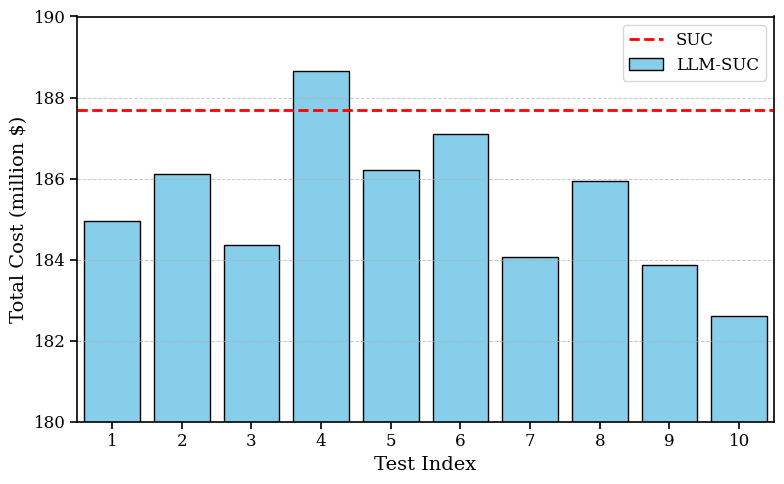

In [47]:
# Convert the costs to million dollars
baseline_sum_m = baseline_sum / 1e6
random_sum_m = random_sum / 1e6

print("Baseline (million $):", baseline_sum_m)
print("Random outcomes (million $):", random_sum_m)

# Create the figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 5))
# Define x-axis positions for the random outcomes (1 through 10)
x = np.arange(1, 11)

# Plot a bar chart for the random outcomes
bars = ax.bar(x, random_sum_m, color='skyblue', edgecolor='black', label='LLM-SUC')

# Draw a horizontal reference line for the baseline
ax.axhline(baseline_sum_m, color='red', linestyle='--', linewidth=2, label='SUC')

# Set the axis labels and x-axis ticks
ax.set_xlabel('Test Index', fontsize=14)
ax.set_ylabel('Total Cost (million $)', fontsize=14)
ax.set_xticks(x)
ax.set_xlim(0.5, 10.5)

# Manually set the y-axis limits to highlight the differences
lower_lim = 180  # lower limit
upper_lim = 190  # upper limit
ax.set_ylim(lower_lim, upper_lim)

# Add grid lines only along the y-axis for clarity
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Add a legend to the plot
ax.legend(fontsize=12)

# Adjust layout tightly and save the figure as a PNG file
plt.tight_layout()
plt.savefig('fig_cost_compare.png', dpi=300, bbox_inches='tight')
plt.show()
